## Imports

In [6]:
import numpy as np
from dt_apriltags import Detector
import matplotlib.pyplot as plt
import cv2
import april_tags
import time
from pid import *

## Camera and Tag Detector Creation

In [7]:
cameraMatrix = np.array([ 1060.71, 0, 960, 0, 1060.71, 540, 0, 0, 1]).reshape((3,3))

camera_params = ( cameraMatrix[0,0], cameraMatrix[1,1], cameraMatrix[0,2], cameraMatrix[1,2] )

In [8]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

## Video Loop

horizontal_output = 13.656797808353804
vertical_output = 22.331632354615365


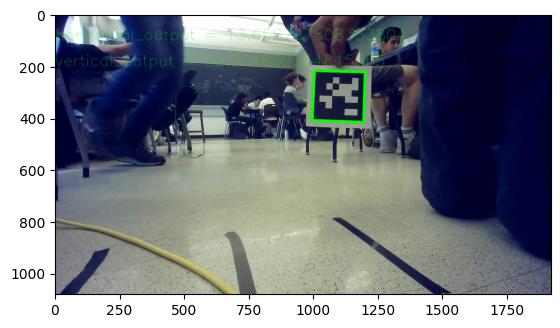

horizontal_output = 16.46282604153141
vertical_output = 11.63579115170178


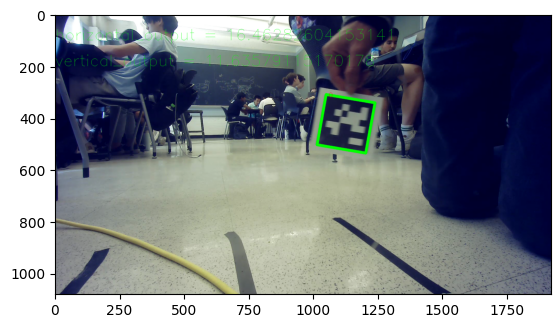

horizontal_output = -11.910684750430153
vertical_output = 29.57044367777527


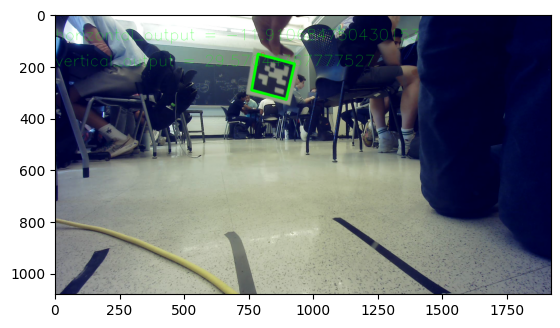

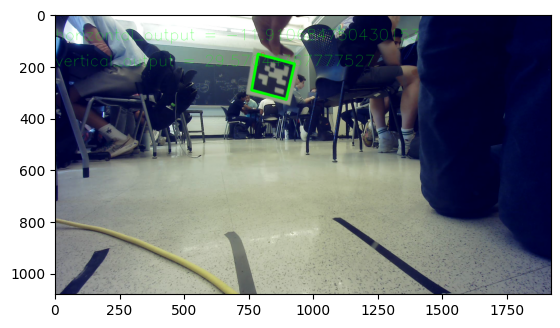

KeyboardInterrupt: 

In [9]:
# The video writer
cap = cv2.VideoCapture("April_Tag_Test.mkv")
fourcc = cv2.VideoWriter_fourcc(*"XVID")

count = 0  # the amount of frames that have been read
frequency = 100  # the number of frames to skip

# create PID objects, no idea what the right values are
horizontal_pid = PID(0.1, 0, 0, 100)
vertical_pid = PID(0.1, 0, 0, 100)

# Video reading loop
while cap.isOpened():
    ret, img = cap.read()
    if count % frequency == 0:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        tags = at_detector.detect(
            gray, estimate_tag_pose=True, camera_params=camera_params, tag_size=True
        )

        if len(tags) > 0:
            positions = april_tags.get_positions(tags)
            errors = april_tags.error_relative_to_center(
                positions, img.shape[0], img.shape[1]
            )
            outputs = april_tags.output_from_tags(errors, horizontal_pid, vertical_pid)
            frame = april_tags.draw_outputs(frame, outputs)
            frame = april_tags.render_tags(tags, img)

        plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        plt.show()

    count += 1

# cv2.imwrite("april_frame1.jpg", img)
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# # img = cv2.imread('april_tags.png', cv2.IMREAD_GRAYSCALE)
# plt.imshow(img)

In [10]:
img = cv2.imread("april_frame1.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
tags = at_detector.detect(gray, True, camera_params, tag_size=True)

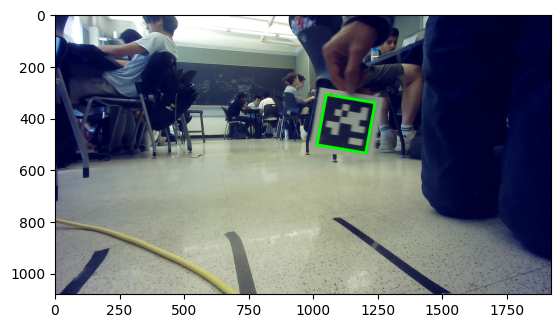

In [11]:
plt.imshow(cv2.cvtColor(april_tags.render_tags(tags, img), cv2.COLOR_BGR2RGB))

In [12]:
tags

[Detection object:
 tag_family = b'tag36h11'
 tag_id = 0
 hamming = 0
 decision_margin = 54.846038818359375
 homography = [[-1.72687687e+01 -9.59038097e+01  1.12469379e+03]
  [ 9.69309743e+01 -1.66650235e+01  4.23560879e+02]
  [ 3.85052411e-04 -1.58447069e-03  1.00000000e+00]]
 center = [1124.69378533  423.5608787 ]
 corners = [[1048.12304688  310.5765686 ]
  [1012.73590088  504.43185425]
  [1200.96350098  536.10101318]
  [1236.38342285  342.88366699]]
 pose_R = [[-0.16676124 -0.98466887 -0.05116551]
  [ 0.98349206 -0.16241661 -0.07977602]
  [ 0.07024283 -0.06362442  0.99549881]]
 pose_t = [[ 0.8495711 ]
  [-0.59624288]
  [ 5.46217222]]
 pose_err = 0.0001547403180021827]

In [ ]:
tags[0].center
# tags[0].pose_R

In [ ]:
positions = april_tags.get_positions(tags)
print(positions)

In [ ]:
errors = april_tags.error_relative_to_center(positions, img.shape[0], img.shape[1])
print(errors)
# plug errors into PID

In [ ]:
# no idea what the right values are
horizontal_pid = PID(0.1, 0, 0, 100)
vertical_pid = PID(0.1, 0, 0, 100) 

In [ ]:
horizontal_output = horizontal_pid.update(errors[0][0])
vertical_output = vertical_pid.update(errors[0][1])

In [ ]:
print(horizontal_output)
print(vertical_output)